## 예제 14-1-1 모듈을 이용해서 데이터 가저오기

### 참조 자료

   https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')                 ## 시본 스타일 지정 
sns.set(font_scale=2.5)                  ## 폰트 사이즈 지정 

                                         ## 경고메시지를 보이지 않도록 처리한다 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import sys
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False       ## 한글 처리시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처

In [4]:
if sys.platform  == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'  
elif sys.platform == 'win32':
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import FinanceDataReader as fdr                 ##  주식 데이터를 가져오는 모듈을 사용합니다. 

In [6]:
fdr.__version__

'0.8.0'

###   차트 설정

In [7]:
plt.rcParams["font.family"] =  "Malgun Gothic"               ## 한글로 차트를 설정합니다. 
plt.rcParams["figure.figsize"] = (14,4)                      ## 그래프의 크기를 지정합니다. 
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

## 상장기업 정보 가져오기

In [8]:
df_krx = fdr.StockListing('KRX')                      ## 한국 상장기업을 가져옵니다 

In [9]:
type(df_krx)

pandas.core.frame.DataFrame

In [10]:
df_krx.head()

,Symbol,Name,Sector,Industry
0,155660,DSR,1차 비철금속 제조업,합섬섬유로프
1,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"


In [11]:
df_krx.tail()

,Symbol,Name,Sector,Industry
2311,199800,툴젠,자연과학 및 공학 연구개발업,"유전자가위 (유전체 교정 도구) 및 이를 이용한 유전자세포치료제, 고부가가치 가축,..."
2312,217880,틸론,소프트웨어 개발 및 공급업,"Cloud Solution (D,A,E,Rstation)"
2313,202960,판도라티비,소프트웨어 개발 및 공급업,"판도라TV, KM 플레이어"
2314,331660,한국미라클피플사,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등"
2315,226610,한국비엔씨,의료용 기기 제조업,"필러 등 메조테라피제품, 유착방지재, 콜라겐흡수성창상피복재, 콜라겐사용조직보충재 등"


In [12]:
df_krx.shape, df_krx.ndim, df_krx.size

((2316, 4), 2, 9264)

In [13]:
df_krx.values                            ## 데이터프레임도 다차원배열로 데이터를 관리한다 

array([['155660', 'DSR', '1차 비철금속 제조업', '합섬섬유로프'],
       ['001250', 'GS글로벌', '상품 종합 도매업',
        '수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서비스/부동산 임대'],
       ['082740', 'HSD엔진', '일반 목적용 기계 제조업', '대형선박용엔진,내연발전엔진'],
       ...,
       ['202960', '판도라티비', '소프트웨어 개발 및 공급업', '판도라TV, KM 플레이어'],
       ['331660', '한국미라클피플사', '기타 화학제품 제조업', '은나노스텝, 닥터오렌지 등'],
       ['226610', '한국비엔씨', '의료용 기기 제조업',
        '필러 등 메조테라피제품, 유착방지재, 콜라겐흡수성창상피복재, 콜라겐사용조직보충재 등']], dtype=object)

In [14]:
df_krx.columns                                ## 열의 이름을 가져온다 

Index(['Symbol', 'Name', 'Sector', 'Industry'], dtype='object')

In [15]:
df_krx.dtypes                              ## 자료형을 확인한다 

Symbol      object
Name        object
Sector      object
Industry    object
dtype: object

In [16]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 4 columns):
Symbol      2316 non-null object
Name        2316 non-null object
Sector      2316 non-null object
Industry    2295 non-null object
dtypes: object(4)
memory usage: 72.5+ KB


### 결측치 정리

In [17]:
df_krx['isnan'] = df_krx.isna()['Industry']             ## 결측값 여부를 확인하고 하나의 열에 추가한다 

In [18]:
df_krx.head()

,Symbol,Name,Sector,Industry,isnan
0,155660,DSR,1차 비철금속 제조업,합섬섬유로프,False
1,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",False
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진",False
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업,False
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매",False


In [19]:
d = df_krx[df_krx['isnan'] == True]              ## 결측값이 있는 것만 가져온다 

In [20]:
d.shape

(21, 5)

In [21]:
d.head()

,Symbol,Name,Sector,Industry,isnan
81,168490,한국패러랠,신탁업 및 집합투자업,NaN,True
278,191600,티케이씨,전자부품 제조업,NaN,True
304,102260,동성코퍼레이션,회사 본부 및 경영 컨설팅 서비스업,NaN,True
627,102280,쌍방울,봉제의복 제조업,NaN,True
749,323230,신한제5호스팩,금융 지원 서비스업,NaN,True


In [22]:
import numpy as np                                ## 넘파이 모듈을 사용한다 

In [23]:
                          ## 삼항연산인 where 함수를 사용해서 industry 열을 추가한다 
df_krx['Industry'] =  np.where(df_krx['isnan'] == True, df_krx['Sector'], df_krx['Industry'])

In [24]:
df_krx.loc[81]                               ##  결측값이 처리된 것을 확인한다. 

Symbol           168490
Name              한국패러랠
Sector      신탁업 및 집합투자업
Industry    신탁업 및 집합투자업
isnan              True
Name: 81, dtype: object

In [25]:
df_krx['Industry'].isna().sum()

0

In [26]:
del df_krx['isnan']                  ## 열을 삭제한다 

In [27]:
df_krx.head()

,Symbol,Name,Sector,Industry
0,155660,DSR,1차 비철금속 제조업,합섬섬유로프
1,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"


In [28]:
df_005930 = fdr.DataReader('005930', '2018','2019')        ## 특정 코드로 주식 가격을 가져온다 

In [29]:
df_005930.head()                                              ##  주식에 대한 5개 정보를 조회한다 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [30]:
df_005930.describe()                                                   ## 기술 통계를 계산한다 

,Open,High,Low,Close,Volume,Change
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000
mean,46216.147541,46699.627049,45690.122951,46830.122951,7.767970e+06,-0.000985
std,6211.325438,6260.034968,6087.189644,3452.522485,7.354287e+06,0.016883
min,0.000000,0.000000,0.000000,38250.000000,0.000000e+00,-0.048565
25%,44447.500000,44887.500000,44000.000000,44700.000000,3.153292e+05,-0.011149
50%,46755.000000,47175.000000,46250.000000,46850.000000,8.268154e+06,0.000000
75%,49612.500000,50185.000000,49080.000000,49627.500000,1.168827e+07,0.008765
max,53380.000000,54140.000000,52440.000000,53000.000000,6.349111e+07,0.047450


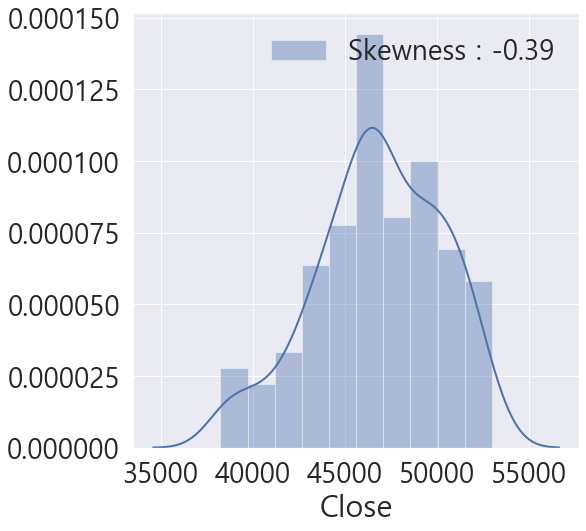

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_005930['Close'],                                     ## 주식 종가로 디스플랏 그래프를 그린다. 
                 color='b', 
                 label='Skewness : {:.2f}'.format(df_005930['Close'].skew()),
                 ax=ax)
g = g.legend(loc='best')

In [32]:
df_000660 = fdr.DataReader('000660', '2018','2019')          ## 다른 주식을 가져온다 

In [33]:
df_000660.describe()

,Open,High,Low,Close,Volume,Change
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000
mean,78567.622951,79562.295082,77417.213115,78449.180328,3.814150e+06,-0.000708
std,8163.215250,8162.519258,8052.841869,8123.448212,1.558810e+06,0.022570
min,58200.000000,59400.000000,58100.000000,58600.000000,1.489091e+06,-0.070535
25%,72200.000000,73275.000000,71125.000000,72125.000000,2.694338e+06,-0.014834
50%,78800.000000,79700.000000,77750.000000,78750.000000,3.362270e+06,0.000000
75%,85000.000000,86025.000000,83625.000000,84525.000000,4.684567e+06,0.012152
max,95300.000000,97700.000000,94600.000000,95300.000000,1.037892e+07,0.069585


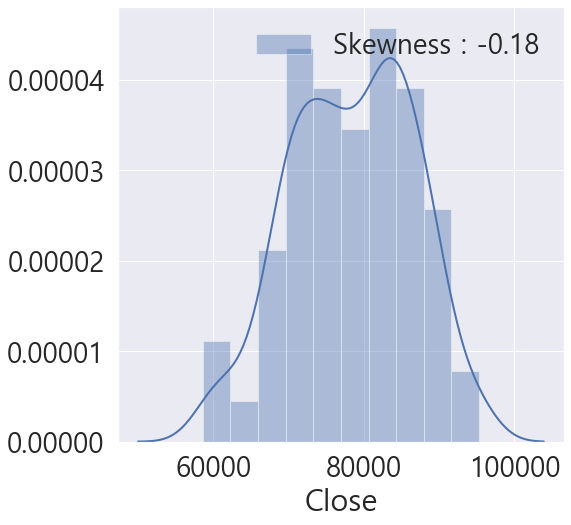

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_000660['Close'],                               ## 주식 종가로 디스플랏 그래프를 그린다
                 color='b', 
                 label='Skewness : {:.2f}'.format(df_000660['Close'].skew()),
                 ax=ax)
g = g.legend(loc='best')
plt.show()

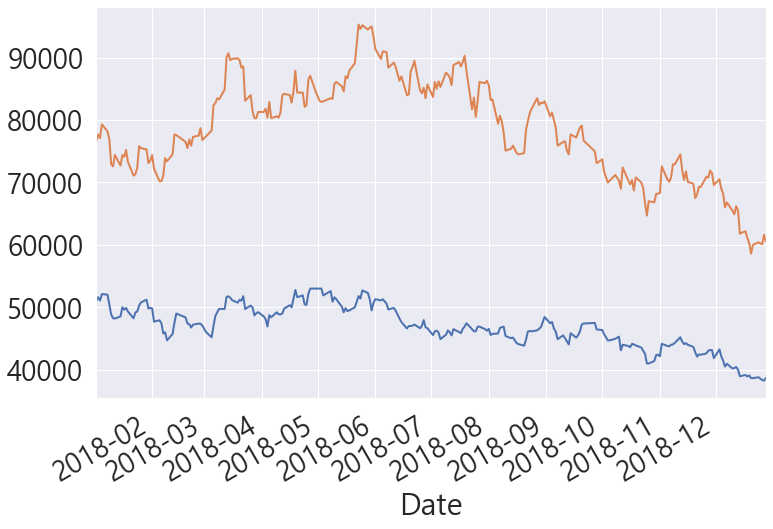

In [35]:
fig, ax = plt.subplots(1, 1)                                           ## 두 그래프의 종가로  선 그래프를 그리면  금액이 차이가 발생한다 
ax = df_005930['Close'].plot(figsize=(12, 8))
ax = df_000660['Close'].plot(figsize=(12, 8))
plt.show()

### 종가 누적 합 구하기

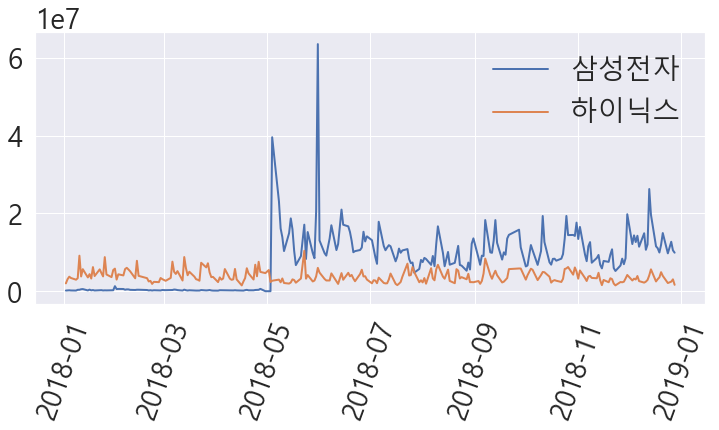

In [36]:
fig = plt.figure(figsize=(12, 5))                                  ## 두 그래프의 거래량으로 그래프를 그린다 
ax = fig.add_subplot(111)
plt.plot(df_005930.index,df_005930['Volume'],label="삼성전자")
plt.plot(df_000660.index,df_000660['Volume'],label="하이닉스")
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.show()

In [37]:
df_cummax_005930 = df_005930['Close'].cummax()

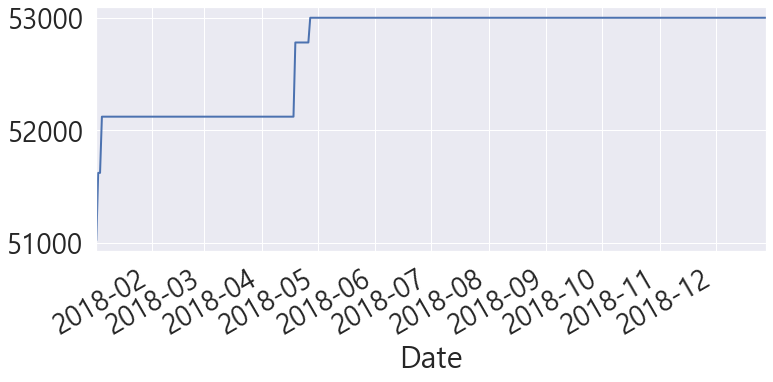

In [38]:
df_cummax_005930.plot(figsize=(12, 5))

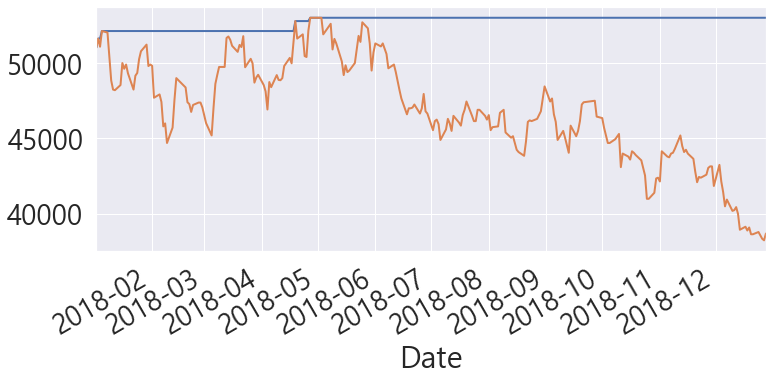

In [39]:
ax1=plt.subplot(1, 1, 1)

df_cummax_005930.plot(ax=ax1)                          ## 누적 종가에 대한 선그래프를 그린다 
df_005930['Close'].plot(figsize=(12, 5), ax=ax1)        ## 종가에 대한 선 그래프를 그린다 

In [40]:
df_cummax_000660 = df_000660['Close'].cummax()                 ## 종가에 대한 누넉금액을 가져온다 


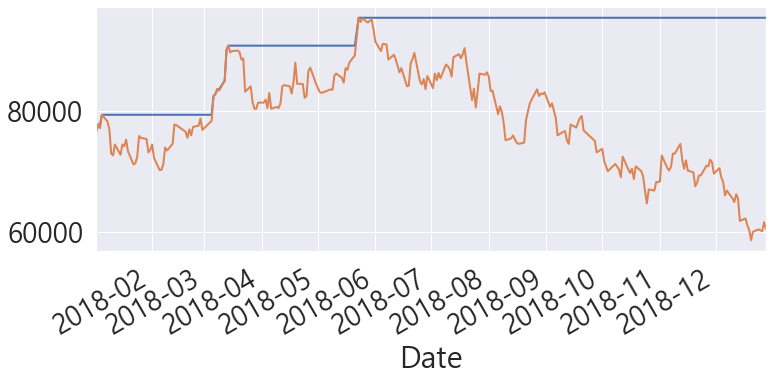

In [41]:
ax1=plt.subplot(1, 1, 1)

df_cummax_000660.plot(ax=ax1)                                 ## 누적 종가에 대한 선그래프를 그린다 
df_000660['Close'].plot(figsize=(12, 5), ax=ax1)              ## 종가에 대한 선 그래프를 그린다 

In [42]:
import mpl_finance                           ## 캔들차트를 그리기 위해서 모듈을 사용한다 

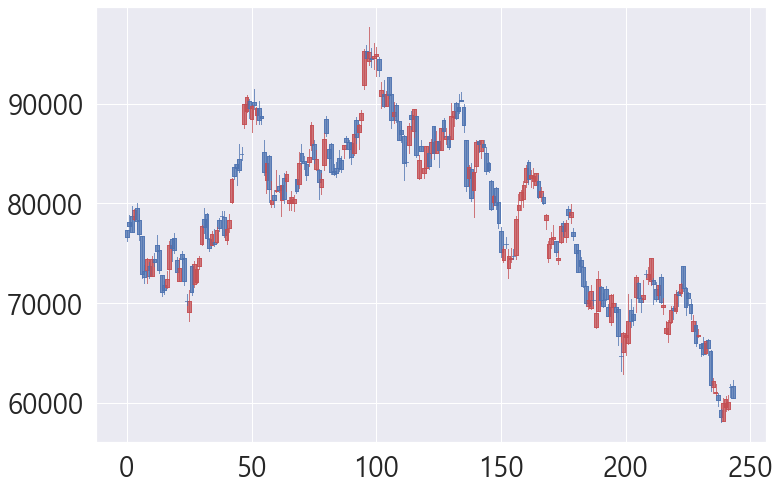

In [43]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, df_000660['Open'],              ## 시가 
                                  df_000660['High'],              ## 고가 
                                  df_000660['Low'],               ## 저가
                                  df_000660['Close'],             ## 종가
                                  width=1.5, colorup='r', colordown='b')

plt.show()

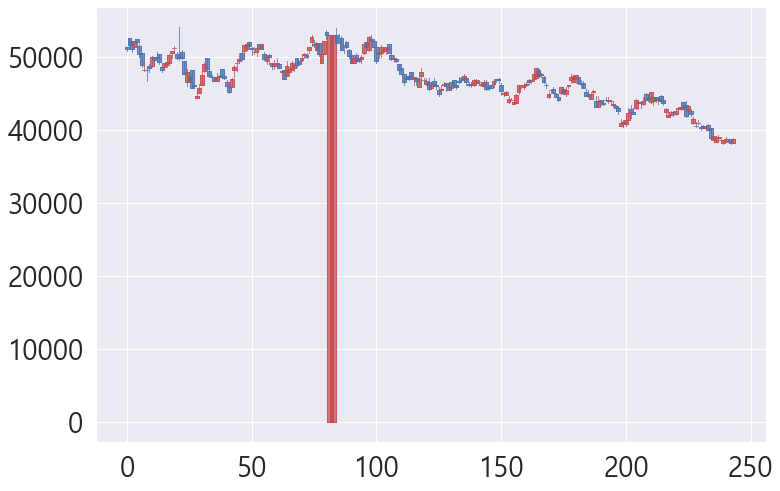

In [44]:
fig = plt.figure(figsize=(12, 8))                       ## 캔들차트를 그리면 특정 시점에 큰 막대가 그려지는 것을 볼 수 있다 
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, df_005930['Open'],
                                  df_005930['High'],
                                  df_005930['Low'], 
                                  df_005930['Close'],
                                  width=1.5, colorup='r', colordown='b')

plt.show()

In [45]:
df_000660['20d'] = np.round(df_000660["Close"].rolling(window=20).mean(), 2)           ## 이동평균을 계산한다 

In [46]:
df_000660['60d'] = np.round(df_000660["Close"].rolling(window= 60).mean(), 2)          ## 이동평균을 계산한다 

In [47]:
df_000660['120d'] = np.round(df_000660["Close"].rolling(window=120).mean(), 2)      ## 이동평균을 계산한다 

In [48]:
df_000660['20-120'] = df_000660['20d'] - df_000660['120d']

In [49]:
df_000660['20-60'] = df_000660['20d'] - df_000660['60d']

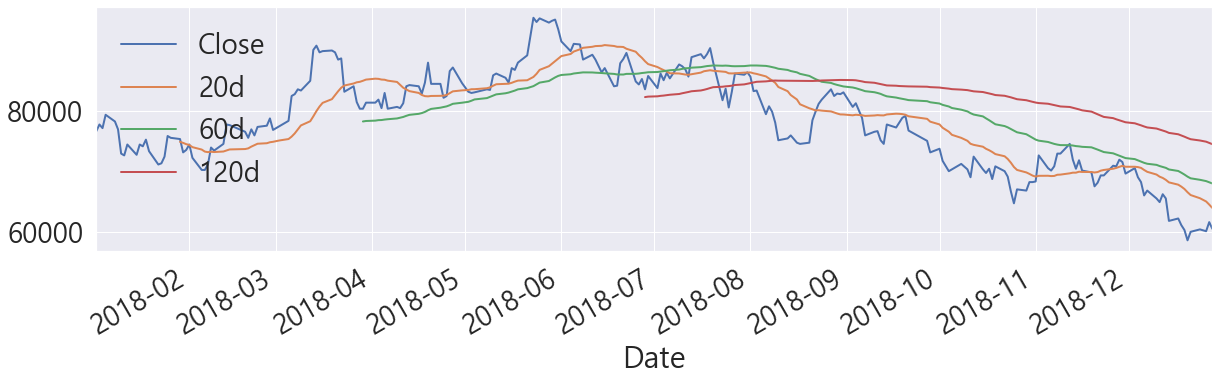

In [50]:
df_000660[['Close','20d','60d','120d']].plot(figsize=(20,5))        ## 종가와 평균에 대한 선 그래프를 그린다 

In [51]:
SD = 65

In [52]:
df_000660['매매구간'] = np.where(df_000660['20-120']> SD,1,0)              ##  매매구간을 지정한다 

In [53]:
df_000660['매매구간'] = np.where(df_000660['20-120'] < -SD, -1, df_000660['매매구간'])

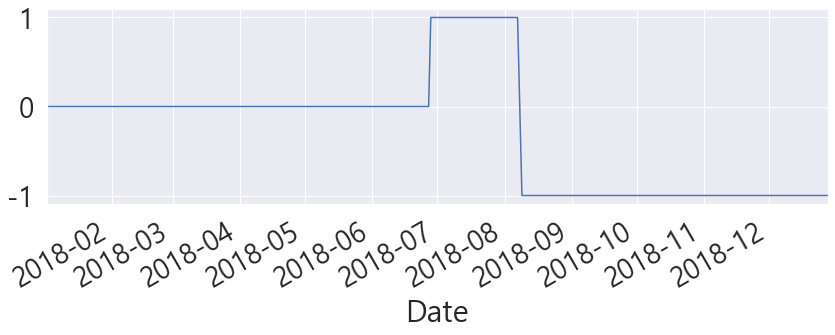

In [54]:
df_000660['매매구간'].plot(lw=1.5)

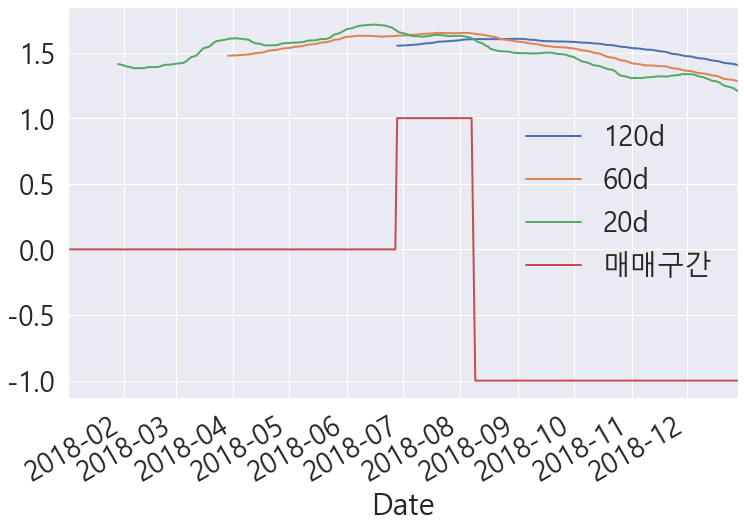

In [55]:
fig = plt.figure(figsize=(12, 8))
ax3 = fig.add_subplot(111)
(df_000660['120d']/df_005930['Close'].max()).plot(ax=ax3)
(df_000660['60d']/df_005930['Close'].max()).plot(ax=ax3)
(df_000660['20d']/df_005930['Close'].max()).plot(ax=ax3)
df_000660['매매구간'].plot( ax=ax3)                            ## 이동평군과 매매구간을 하나의 그래프로 그린다 
plt.legend()